In [ ]:
import sympy
from sympy import Eq, S, latex, plot_implicit, Matrix, symbols, simplify, expand, collect, solve, solveset
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
from sympy import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

# Занятие 13
# Алгебра
### Задание 1.
Составить матрицу квадратичной формы $7x^2+10\sqrt{3}xy-3y^2−20z^2$, проверить, что она определяет именно заданное уравнение. Найти и вывести на экран собственные числа и собственные векторы матрицы квадратичной формы. 

In [7]:
from sympy.abc import x, y, z

u = 7*x**2 - 3*y**2 - 20*z**2 + 10*sqrt(3)*x*y
A = Matrix([[7, 5*sqrt(3), 0], [5*sqrt(3), -3, 0], [0, 0, -20]])
X = Matrix([x, y, z])
res = simplify(expand(X.T*A*X))
display(X, res, res[0] - u)

ev = A.eigenvects()#собственные векторы матрицы $A$
P = Matrix([])
for item in ev:
    degree = item[1]
    print('собственное число', item[0], 'кратность', degree, 'собственный вектор')
    for i in range(degree): # это на случай кратных собственных чисел
        e_i = item[2][i]
        display(e_i)
        P = P.row_join(e_i.normalized()) # нормируем собственные векторы матрицы $A$
display(P)

Matrix([
[x],
[y],
[z]])

Matrix([[7*x**2 + 10*sqrt(3)*x*y - 3*y**2 - 20*z**2]])

0

собственное число -20 кратность 1 собственный вектор


Matrix([
[0],
[0],
[1]])

собственное число -8 кратность 1 собственный вектор


Matrix([
[-sqrt(3)/3],
[         1],
[         0]])

собственное число 12 кратность 1 собственный вектор


Matrix([
[sqrt(3)],
[      1],
[      0]])

Matrix([
[0,      -1/2, sqrt(3)/2],
[0, sqrt(3)/2,       1/2],
[1,         0,         0]])

### Задание 2.
Привести квадратичную форму Примера 1 к каноническому виду с помощью перехода к новому базису из собственных векторов.

In [12]:
A = Matrix([[7, 5*sqrt(3), 0], [5*sqrt(3), -3, 0], [0, 0, -20]])
P = Matrix([vector[2][0].transpose() for vector in A.eigenvects()]).transpose()
A_new = P**(-1)*A*P
display(A, P, A_new)

Matrix([
[        7, 5*sqrt(3),   0],
[5*sqrt(3),        -3,   0],
[        0,         0, -20]])

Matrix([
[0, -sqrt(3)/3, sqrt(3)],
[0,          1,       1],
[1,          0,       0]])

Matrix([
[-20,  0,  0],
[  0, -8,  0],
[  0,  0, 12]])

### Задание 3.
Определить тип кривой второго порядка, заданной уравнением
$$
97x^2 - 144xy + 97y^2 + 482x - 532y = 3452
$$
Построить в одной координатной плоскости график заданного уравнения и канонического уравнения соответствующей кривой, каноническое уравнение сделать названием графика. 

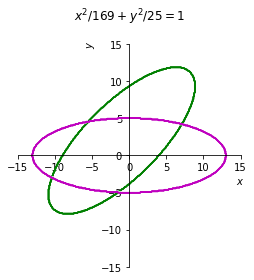

In [59]:
from sympy.abc import x, y, z, X, Y, Z

# Вводим данные
A3 = Matrix([[97, -72, 241], [-72, 97, -266], [241, -266, -3452]])
X3 = Matrix([x, y, 1])
# display(A3, X3)

# Выводим уравнение, чтобы проверить, что данные введены правильно
eq3 = Eq(simplify(expand(X3.transpose()*A3*X3))[0], 0)
# display(eq3)

# Состовляем матрицу поворота
alpha = sympy.acot((A3[0, 0] - A3[1, 1])/(2*A3[0, 1]))/2
P = Matrix([[Cos(alpha), -Sin(alpha), 0], [Sin(alpha), Cos(alpha), 0], [0, 0, 1]])
# display(P)

# Поворот
A3 = simplify(expand((P.transpose()*A3*P)))
# display(A3)

# Матрица после поворота
X3 = Matrix((X, Y, 1))
simplify(expand((X3.T*A3*X3)[0]))

# Перенос начала координат
X3_new = Matrix((X - A3[0, 2]/A3[0, 0], Y - A3[1, 2]/A3[1, 1], 1))
eq3_new = simplify(expand(X3_new.T*A3*X3_new))[0]
# display(X3_new, eq3_new)

# Переносим свободынй член в правую часть
free = eq3_new.subs({X: 0, Y: 0})
eq3_last = eq3_new/(-free) + 1
Eq(eq3_last, 1)

# Замена переменных для графика
eq3_last_xy = Eq(eq3_last.subs({X: x, Y: y}), 1)
# display(eq3_last_xy)

# График
p = plot_implicit(eq3, line_color='g', aspect_ratio=(1, 1), xlabel='$x$', ylabel='$y$', 
                  title=latex(eq3_last_xy, mode='inline') + '\n', adaptive=False, show=False,
                  x_var = (x, -15, 15), y_var = (y, -15, 15))
p.extend(plot_implicit(eq3_last_xy, line_color='m', aspect_ratio=(1, 1), adaptive=False, show=False, x_var = (x, -15, 15), y_var = (y, -15, 15)))
p.show()

### Задание 4.
Определить тип кривой второго порядка, заданной уравнением
$$
x^2+2xy+y^2-4x+4y=4
$$
Построить в одной координатной плоскости график заданного уравнения и канонического уравнения соответствующей кривой, каноническое уравнение сделать названием графика. 

Указание: каноническое уравнение параболы $y^2 = 2px$ или $x^2 = 2py$; для того, чтобы выразить $x$ или $y$ можно воспользоваться solve или solveset.

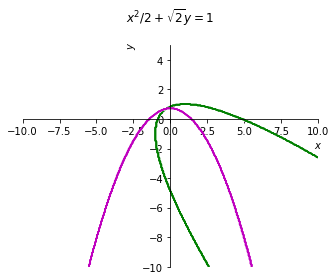

In [91]:
from sympy.abc import x, y, z, X, Y, Z

# Вводим данные
A3 = Matrix([[1, 1, -2], [1, 1, 2], [-2, 2, -4]])
X3 = Matrix([x, y, 1])
# display(A3, X3)

# Выводим уравнение, чтобы проверить, что данные введены правильно
eq3 = Eq(simplify(expand(X3.transpose()*A3*X3))[0], 0)
# display(eq3)

# Состовляем матрицу поворота
alpha = sympy.acot((A3[0, 0] - A3[1, 1])/(2*A3[0, 1]))/2
P = Matrix([[Cos(alpha), -Sin(alpha), 0], [Sin(alpha), Cos(alpha), 0], [0, 0, 1]])
# display(P)

# Поворот
A3 = simplify(expand((P.transpose()*A3*P)))
# display(A3)

# Матрица после поворота
X3 = Matrix((X, Y, 1))
simplify(expand((X3.T*A3*X3)[0]))

# Перенос начала координат
X3_new = Matrix((X - A3[0, 2]/A3[0, 0], Y, 1))
eq3_new = simplify(expand(X3_new.T*A3*X3_new))[0]
# display(X3_new, eq3_new)

# Переносим свободынй член в правую часть
free = eq3_new.subs({X: 0, Y: 0})
eq3_last = eq3_new/(-free) + 1
Eq(eq3_last, 1)

# Замена переменных для графика
eq3_last_xy = Eq(eq3_last.subs({X: x, Y: y}), 1)
# display(eq3_last_xy)

# График
xlim = (x, -10, 10)
ylim = (y, -10, 5)
p = plot_implicit(eq3, line_color='g', aspect_ratio=(1, 1), xlabel='$x$', ylabel='$y$', 
                  title=latex(eq3_last_xy, mode='inline') + '\n', adaptive=False, show=False,
                  x_var = xlim, y_var = ylim)
p.extend(plot_implicit(eq3_last_xy, line_color='m', aspect_ratio=(1, 1), adaptive=False, show=False, x_var = xlim, y_var = ylim))
p.show()

###  Индивидуальное задание
Составить матрицу квадратичной формы и привести ее к каноническому виду с помощью перехода к новому базису из собственных векторов. Векторы выводить на экран не нужно. Вывести на экран матрицу в исходном виде и канонической форме, а также саму квадратичную форму в каноническом виде.

Вариант N36

$$Q = 9879 x^{2} - 80 \sqrt{6} x y + 2984 \sqrt{6} x z - 5725 y^{2} + 960 y z - 7279 z^{2}$$

In [66]:
A = Matrix([[9879, -40*sqrt(6), 1492*sqrt(6)], [-40*sqrt(6), -5725, 480], [1492*sqrt(6), 480, -7279]])
P = Matrix([vector[2][0].transpose() for vector in A.eigenvects()]).transpose()
A_new = P**(-1)*A*P
display(A, P, A_new)

Matrix([
[        9879, -40*sqrt(6), 1492*sqrt(6)],
[ -40*sqrt(6),       -5725,          480],
[1492*sqrt(6),         480,        -7279]])

Matrix([
[-sqrt(6)/12, -sqrt(6)/12, 2*sqrt(6)],
[      -5/24,           5,         0],
[          1,           1,         1]])

Matrix([
[-8125,     0,     0],
[    0, -5625,     0],
[    0,     0, 10625]])